In [1]:
import sys
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

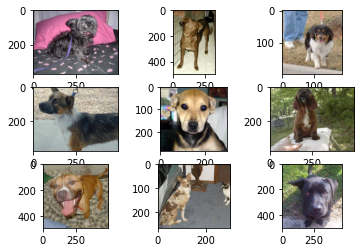

In [3]:
folder = '/home/caio/Downloads/dogs-vs-cats/train/dogs/'

for i in range(9):
    plt.subplot(330 + 1 + i)
    filename = folder + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)

plt.show()

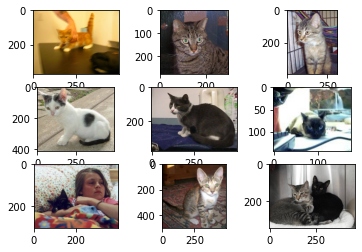

In [4]:
folder = '/home/caio/Downloads/dogs-vs-cats/train/cats/'

for i in range(9):
    plt.subplot(330 + 1 + i)
    filename = folder + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)

plt.show()

In [5]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',
                     kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [14]:
def summarize_diagnostics(history):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.show()

Found 222 images belonging to 2 classes.
Epoch 1/50
4/4 [==============================] - 6s 1s/step - loss: 86.3475 - accuracy: 0.4829
Epoch 2/50
4/4 [==============================] - 5s 1s/step - loss: 89.0099 - accuracy: 0.5172
Epoch 3/50
4/4 [==============================] - 5s 1s/step - loss: 15.7399 - accuracy: 0.5441
Epoch 4/50
4/4 [==============================] - 5s 1s/step - loss: 13.7561 - accuracy: 0.4789
Epoch 5/50
4/4 [==============================] - 5s 1s/step - loss: 9.9517 - accuracy: 0.4871
Epoch 6/50
4/4 [==============================] - 5s 1s/step - loss: 5.2803 - accuracy: 0.5400
Epoch 7/50
4/4 [==============================] - 5s 1s/step - loss: 3.6881 - accuracy: 0.5136
Epoch 8/50
4/4 [==============================] - 5s 1s/step - loss: 1.9913 - accuracy: 0.5509
Epoch 9/50
4/4 [==============================] - 5s 1s/step - loss: 1.1206 - accuracy: 0.6701
Epoch 10/50
4/4 [==============================] - 5s 1s/step - loss: 0.4726 - accuracy: 0.8192
Epoc

KeyError: 'val_loss'

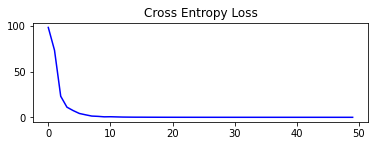

In [10]:
model = define_model()

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_it = datagen.flow_from_directory('/home/caio/Downloads/dogs-vs-cats/train/', class_mode='binary', batch_size=64, target_size=(200, 200))

history = model.fit(train_it, steps_per_epoch=len(train_it),
                              epochs=50, verbose=True)

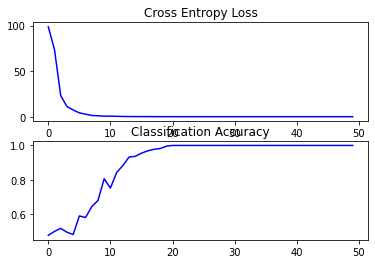

In [15]:
summarize_diagnostics(history)